In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# Load the dataset
train_df = pd.read_csv(r"C:\Users\haris\major\DRS\DRS\dataset\drugsComTrain_raw.csv", sep=',')
test_df = pd.read_csv(r"C:\Users\haris\major\DRS\DRS\dataset\drugsComTest_raw.csv", sep=',')

In [40]:
train_df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [43]:
test_df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [47]:
# Drop rows with missing values in 'review' or 'rating'
#train_df.dropna(subset=['review', 'rating', 'usefulCount'], inplace=True)
#test_df.dropna(subset=['review', 'rating', 'usefulCount'], inplace=True)
train_test_df = pd.concat([train_df, test_df], ignore_index=True)
train_test_df.dropna(subset=['review', 'rating', 'usefulCount'], inplace=True)
train_test_df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [49]:
# Convert reviews to lowercase
train_test_df['review'] = train_test_df['review'].astype(str).str.lower()

In [51]:
# Generate sentiment labels: 1 for positive, 0 for negative
train_test_df['sentiment'] = train_test_df['rating'].apply(lambda x: 1 if x >= 5 else 0)


In [53]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    train_test_df['review'], 
    train_test_df['sentiment'], 
    test_size=0.2, 
    random_state=42
)

In [55]:
X_train.head()

208148    "i&#039;ve been having troubles with ibs-d sym...
81936     "i have chronic panic disorder with agoraphobi...
46314     "i don&#039;t think this is as effective as th...
69740     "i have bulging disc c4,5 and 6, cervical radi...
58872     "i&#039;ve been on zovia for 5 years, and have...
Name: review, dtype: object

In [57]:
X_val.head()

14311     "i suffered a .45 caliber gsw to the head in 2...
72301     "i started on viibryd after having a dna test ...
23041                            "not covered by insurance"
197721    "i previously did a review on nuva ring about ...
133612    "my son was prescribed the drug just before su...
Name: review, dtype: object

In [59]:
# Initialize and fit the vectorizer
vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

In [60]:
# Initialize and train the SVM model
svc = LinearSVC(dual=False)
svc.fit(X_train_tfidf, y_train)

LinearSVC(dual=False)

In [61]:
# Validation predictions and metrics
val_pred = svc.predict(X_val_tfidf)
print("Validation Accuracy:", accuracy_score(y_val, val_pred))
print("Classification Report:\n", classification_report(y_val, val_pred))

Validation Accuracy: 0.8649013089066097
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.66      0.71     10722
           1       0.89      0.93      0.91     32291

    accuracy                           0.86     43013
   macro avg       0.83      0.80      0.81     43013
weighted avg       0.86      0.86      0.86     43013



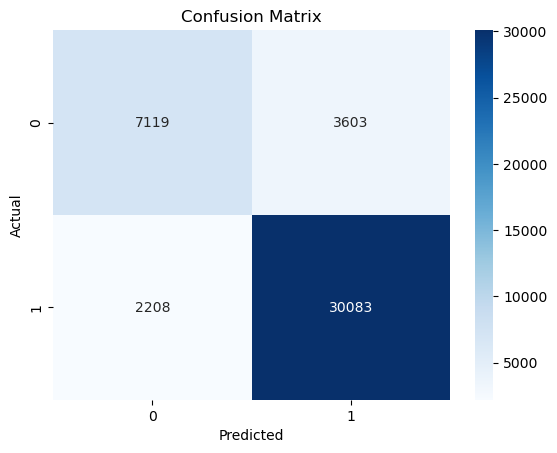

In [62]:
# Confusion matrix heatmap
conf_matrix = confusion_matrix(y_val, val_pred)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [85]:
# Filter the dataset for a specific condition
data_filtered = train_df[train_df['condition'] == "Birth Control"][['drugName', 'review', 'usefulCount']]


In [87]:
# Extract drug names and reviews
drug_list = data_filtered['drugName'].tolist()
review_list = data_filtered['review'].tolist()
useful_count_list = data_filtered['usefulCount'].tolist()

In [91]:
print(f"Number of reviews : {len(review_list)}")

Number of reviews : 28788


In [93]:
# Function for sentiment analysis
def sentiment_analysis_with_useful_count(review):
    review_tfidf = vectorizer.transform([review])
    prediction = svc.predict(review_tfidf)[0]
    return prediction

In [95]:
# Analyze sentiment and aggregate useful counts
drug_sentiment_data = {}

for i, review in enumerate(review_list):
    sentiment = sentiment_analysis_with_useful_count(review)
    drug_name = drug_list[i]
    useful_count = useful_count_list[i]
    
    if drug_name not in drug_sentiment_data:
        drug_sentiment_data[drug_name] = {'positive_count': 0, 'useful_count_sum': 0}
    
    if sentiment == 1:  # Positive sentiment
        drug_sentiment_data[drug_name]['positive_count'] += 1
        drug_sentiment_data[drug_name]['useful_count_sum'] += useful_count
# Convert drug sentiment data to a DataFrame for sorting
drug_summary_df = pd.DataFrame.from_dict(drug_sentiment_data, orient='index')
drug_summary_df['drugName'] = drug_summary_df.index
drug_summary_df.reset_index(drop=True, inplace=True)

# Sort by positive count and useful count sum
drug_summary_df.sort_values(by=['positive_count', 'useful_count_sum'], ascending=False, inplace=True)

In [96]:
# Display the top recommended drugs
top_drugs = drug_summary_df.head(5)
print("Top Recommended Drugs Based on Positive Reviews and Useful Count:")
print(top_drugs)

Top Recommended Drugs Based on Positive Reviews and Useful Count:
    positive_count  useful_count_sum                           drugName
4             2106             14960                       Etonogestrel
10            1750             14329                     Levonorgestrel
21            1434             12808  Ethinyl estradiol / norethindrone
3             1315              8467                          Nexplanon
15            1044              9949   Ethinyl estradiol / norgestimate
